Tempo total simulado: 1000000
Número total de chegadas: 4501427
Número de chegadas bloqueadas: 1332484
Probabilidade de bloqueio (simulação): 0.2960
Taxa efetiva de chegada ao servidor 2: 3.1689
Ocupação média fila 1: 1.6474
Ocupação média fila 2: 2.0371
Número total de saídas do sistema: 3168941
Tempo médio de permanência na fila 1 (simulação): 0.5199
Tempo médio de permanência na fila 2 (simulação): 0.6428
Tempo médio total no sistema (simulação): 1.1627


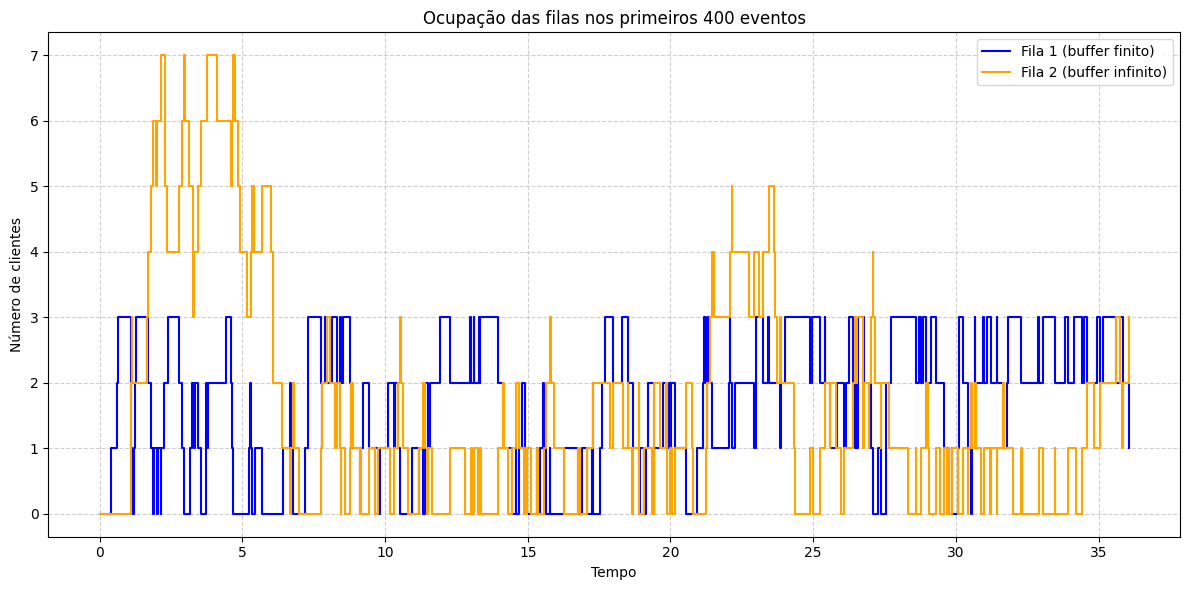

In [5]:
import numpy as np
import matplotlib.pyplot as plt

# ----- PARÂMETROS -----
taxa_chegada = 4.5    # lambda1, clientes por unidade de tempo
taxa_servico_1 = 4.0  # mu1, clientes por unidade de tempo
taxa_servico_2 = 4.5  # mu2, clientes por unidade de tempo
buffer_1 = 3       # K, capacidade máxima do buffer 1 (inclui atendimento)
tempo_simulacao = 1000000    # Tempo total de simulação
max_pontos_grafico = 400    # Só mostrar os primeiros 400 eventos no gráfico

np.random.seed(42)

# Estado do sistema
num_fila_1 = 0
num_fila_2 = 0
tempo_atual = 0.0

# Estatísticas
chegadas_totais = 0
chegadas_bloqueadas = 0
saidas_totais_2 = 0
area_fila_1 = 0.0
area_fila_2 = 0.0
tempo_ultimo_evento = 0.0

# Para visualização apenas dos primeiros 400 eventos
linha_tempo = [0.0]
fila_1_lista = [0]
fila_2_lista = [0]

# Para tempos médios de permanência
fila_1_entradas = []  # Guarda tempos de chegada à fila 1
saidas_fila_1 = []    # Guarda tempos de permanência na fila 1
fila_2_entradas = []  # Guarda tempos de chegada à fila 2
saidas_fila_2 = []    # Guarda tempos de permanência na fila 2

proxima_chegada = np.random.exponential(1/taxa_chegada)
proxima_saida_1 = np.inf
proxima_saida_2 = np.inf

contador_eventos = 0

while tempo_atual < tempo_simulacao:
    tempos = [proxima_chegada, proxima_saida_1, proxima_saida_2]
    prox_evento = np.argmin(tempos)
    tempo_prox = min(tempos)
    area_fila_1 += num_fila_1 * (tempo_prox - tempo_ultimo_evento)
    area_fila_2 += num_fila_2 * (tempo_prox - tempo_ultimo_evento)
    tempo_ultimo_evento = tempo_prox
    tempo_atual = tempo_prox

    # Apenas salvar os primeiros 400 eventos para visualização
    if contador_eventos < max_pontos_grafico:
        linha_tempo.append(tempo_atual)
        fila_1_lista.append(num_fila_1)
        fila_2_lista.append(num_fila_2)
    contador_eventos += 1

    # Evento: CHEGADA
    if prox_evento == 0:
        chegadas_totais += 1
        if num_fila_1 < buffer_1:
            num_fila_1 += 1
            fila_1_entradas.append(tempo_atual)  # <-- NUEVO: registra tiempo de llegada a fila 1
            if num_fila_1 == 1:
                proxima_saida_1 = tempo_atual + np.random.exponential(1/taxa_servico_1)
        else:
            chegadas_bloqueadas += 1
        proxima_chegada = tempo_atual + np.random.exponential(1/taxa_chegada)


    # Evento: SAÍDA SERVIDOR 1
    elif prox_evento == 1:
        if num_fila_1 > 0:
            num_fila_1 -= 1
            # Calcula tempo de permanência na fila 1 para esse cliente
            entrada_fila1 = fila_1_entradas.pop(0)
            saidas_fila_1.append(tempo_atual - entrada_fila1)
            num_fila_2 += 1
            fila_2_entradas.append(tempo_atual)  # Registra chegada na fila 2
            if num_fila_1 > 0:
                proxima_saida_1 = tempo_atual + np.random.exponential(1/taxa_servico_1)
            else:
                proxima_saida_1 = np.inf
            if num_fila_2 == 1:
                proxima_saida_2 = tempo_atual + np.random.exponential(1/taxa_servico_2)


    # Evento: SAÍDA SERVIDOR 2
    elif prox_evento == 2:
        if num_fila_2 > 0:
            num_fila_2 -= 1
            # Calcula tempo de permanência na fila 2 para esse cliente
            entrada_fila2 = fila_2_entradas.pop(0)
            saidas_fila_2.append(tempo_atual - entrada_fila2)
            saidas_totais_2 += 1
            if num_fila_2 > 0:
                proxima_saida_2 = tempo_atual + np.random.exponential(1/taxa_servico_2)
            else:
                proxima_saida_2 = np.inf


# ----- RESULTADOS -----
print(f'Tempo total simulado: {tempo_simulacao}')
print(f'Número total de chegadas: {chegadas_totais}')
print(f'Número de chegadas bloqueadas: {chegadas_bloqueadas}')
print(f'Probabilidade de bloqueio (simulação): {chegadas_bloqueadas / chegadas_totais:.4f}')
print(f'Taxa efetiva de chegada ao servidor 2: {(chegadas_totais - chegadas_bloqueadas) / tempo_simulacao:.4f}')
print(f'Ocupação média fila 1: {area_fila_1 / tempo_simulacao:.4f}')
print(f'Ocupação média fila 2: {area_fila_2 / tempo_simulacao:.4f}')
print(f'Número total de saídas do sistema: {saidas_totais_2}')

# ---- TEMPOS MÉDIOS DE PERMANÊNCIA ----
if len(saidas_fila_1) > 0:
    E_tq1_sim = np.mean(saidas_fila_1)
    print(f'Tempo médio de permanência na fila 1 (simulação): {E_tq1_sim:.4f}')
else:
    print("Sem saídas para calcular E[tq1]")

if len(saidas_fila_2) > 0:
    E_tq2_sim = np.mean(saidas_fila_2)
    print(f'Tempo médio de permanência na fila 2 (simulação): {E_tq2_sim:.4f}')
else:
    print("Sem saídas para calcular E[tq2]")

if len(saidas_fila_1) > 0 and len(saidas_fila_2) > 0:
    print(f'Tempo médio total no sistema (simulação): {(E_tq1_sim + E_tq2_sim):.4f}')


# ----- VISUALIZAÇÃO DOS PRIMEIROS 400 EVENTOS -----
plt.figure(figsize=(12, 6))
plt.step(linha_tempo, fila_1_lista, where='post', label='Fila 1 (buffer finito)', color='blue')
plt.step(linha_tempo, fila_2_lista, where='post', label='Fila 2 (buffer infinito)', color='orange')
plt.xlabel('Tempo')
plt.ylabel('Número de clientes')
plt.title('Ocupação das filas nos primeiros 400 eventos')
plt.legend()
plt.grid(True, linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()

Tempo total simulado: 100000
Número total de chegadas: 150211
Número de chegadas bloqueadas: 11122
Probabilidade de bloqueio (simulação): 0.0740
Taxa efetiva de chegada ao servidor 2: 1.3909
Ocupação média fila 1: 1.7111
Ocupação média fila 2: 2.1057
Número total de saídas do sistema: 139085
Tempo médio de permanência na fila 1 (simulação): 1.2302
Tempo médio de permanência na fila 2 (simulação): 1.5139
Tempo médio total no sistema (simulação): 2.7441


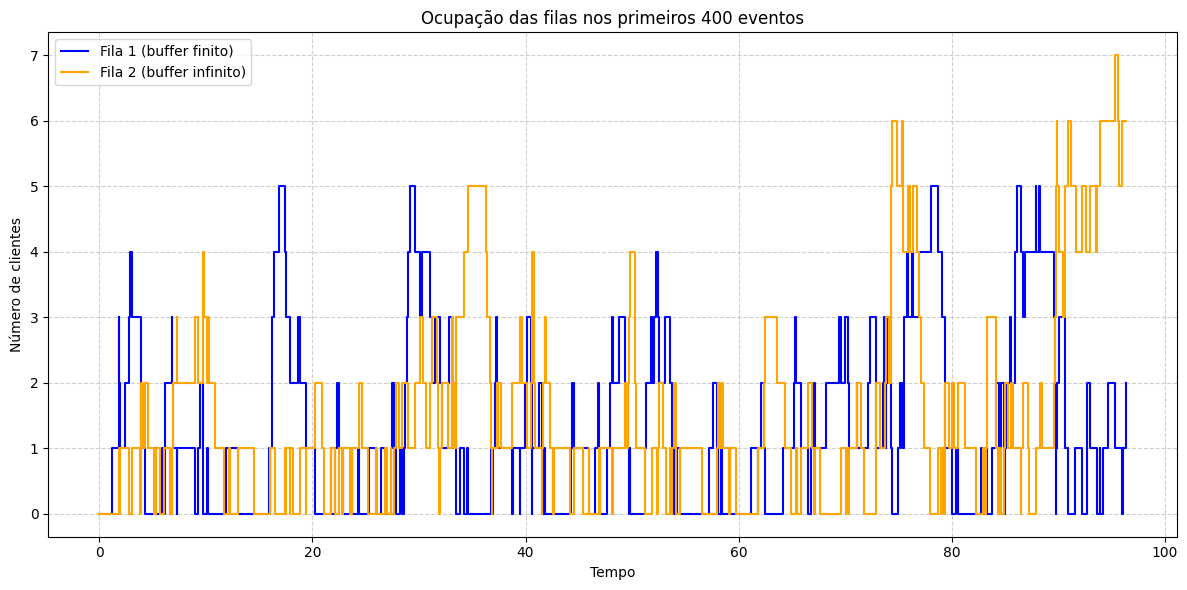

In [6]:
import numpy as np
import matplotlib.pyplot as plt

# ----- PARÂMETROS -----
taxa_chegada = 1.5    # lambda1, clientes por unidade de tempo
taxa_servico_1 = 2.0  # mu1, clientes por unidade de tempo
taxa_servico_2 = 2.0  # mu2, clientes por unidade de tempo
buffer_1 = 5       # K, capacidade máxima do buffer 1 (inclui atendimento)
tempo_simulacao = 100000    # Tempo total de simulação
max_pontos_grafico = 400    # Só mostrar os primeiros 400 eventos no gráfico

np.random.seed(42)

# Estado do sistema
num_fila_1 = 0
num_fila_2 = 0
tempo_atual = 0.0

# Estatísticas
chegadas_totais = 0
chegadas_bloqueadas = 0
saidas_totais_2 = 0
area_fila_1 = 0.0
area_fila_2 = 0.0
tempo_ultimo_evento = 0.0

# Para visualização apenas dos primeiros 400 eventos
linha_tempo = [0.0]
fila_1_lista = [0]
fila_2_lista = [0]

# Para tempos médios de permanência
fila_1_entradas = []  # Guarda tempos de chegada à fila 1
saidas_fila_1 = []    # Guarda tempos de permanência na fila 1
fila_2_entradas = []  # Guarda tempos de chegada à fila 2
saidas_fila_2 = []    # Guarda tempos de permanência na fila 2

proxima_chegada = np.random.exponential(1/taxa_chegada)
proxima_saida_1 = np.inf
proxima_saida_2 = np.inf

contador_eventos = 0

while tempo_atual < tempo_simulacao:
    tempos = [proxima_chegada, proxima_saida_1, proxima_saida_2]
    prox_evento = np.argmin(tempos)
    tempo_prox = min(tempos)
    area_fila_1 += num_fila_1 * (tempo_prox - tempo_ultimo_evento)
    area_fila_2 += num_fila_2 * (tempo_prox - tempo_ultimo_evento)
    tempo_ultimo_evento = tempo_prox
    tempo_atual = tempo_prox

    # Apenas salvar os primeiros 400 eventos para visualização
    if contador_eventos < max_pontos_grafico:
        linha_tempo.append(tempo_atual)
        fila_1_lista.append(num_fila_1)
        fila_2_lista.append(num_fila_2)
    contador_eventos += 1

    # Evento: CHEGADA
    if prox_evento == 0:
        chegadas_totais += 1
        if num_fila_1 < buffer_1:
            num_fila_1 += 1
            fila_1_entradas.append(tempo_atual)  # <-- NUEVO: registra tiempo de llegada a fila 1
            if num_fila_1 == 1:
                proxima_saida_1 = tempo_atual + np.random.exponential(1/taxa_servico_1)
        else:
            chegadas_bloqueadas += 1
        proxima_chegada = tempo_atual + np.random.exponential(1/taxa_chegada)


    # Evento: SAÍDA SERVIDOR 1
    elif prox_evento == 1:
        if num_fila_1 > 0:
            num_fila_1 -= 1
            # Calcula tempo de permanência na fila 1 para esse cliente
            entrada_fila1 = fila_1_entradas.pop(0)
            saidas_fila_1.append(tempo_atual - entrada_fila1)
            num_fila_2 += 1
            fila_2_entradas.append(tempo_atual)  # Registra chegada na fila 2
            if num_fila_1 > 0:
                proxima_saida_1 = tempo_atual + np.random.exponential(1/taxa_servico_1)
            else:
                proxima_saida_1 = np.inf
            if num_fila_2 == 1:
                proxima_saida_2 = tempo_atual + np.random.exponential(1/taxa_servico_2)


    # Evento: SAÍDA SERVIDOR 2
    elif prox_evento == 2:
        if num_fila_2 > 0:
            num_fila_2 -= 1
            # Calcula tempo de permanência na fila 2 para esse cliente
            entrada_fila2 = fila_2_entradas.pop(0)
            saidas_fila_2.append(tempo_atual - entrada_fila2)
            saidas_totais_2 += 1
            if num_fila_2 > 0:
                proxima_saida_2 = tempo_atual + np.random.exponential(1/taxa_servico_2)
            else:
                proxima_saida_2 = np.inf


# ----- RESULTADOS -----
print(f'Tempo total simulado: {tempo_simulacao}')
print(f'Número total de chegadas: {chegadas_totais}')
print(f'Número de chegadas bloqueadas: {chegadas_bloqueadas}')
print(f'Probabilidade de bloqueio (simulação): {chegadas_bloqueadas / chegadas_totais:.4f}')
print(f'Taxa efetiva de chegada ao servidor 2: {(chegadas_totais - chegadas_bloqueadas) / tempo_simulacao:.4f}')
print(f'Ocupação média fila 1: {area_fila_1 / tempo_simulacao:.4f}')
print(f'Ocupação média fila 2: {area_fila_2 / tempo_simulacao:.4f}')
print(f'Número total de saídas do sistema: {saidas_totais_2}')

# ---- TEMPOS MÉDIOS DE PERMANÊNCIA ----
if len(saidas_fila_1) > 0:
    E_tq1_sim = np.mean(saidas_fila_1)
    print(f'Tempo médio de permanência na fila 1 (simulação): {E_tq1_sim:.4f}')
else:
    print("Sem saídas para calcular E[tq1]")

if len(saidas_fila_2) > 0:
    E_tq2_sim = np.mean(saidas_fila_2)
    print(f'Tempo médio de permanência na fila 2 (simulação): {E_tq2_sim:.4f}')
else:
    print("Sem saídas para calcular E[tq2]")

if len(saidas_fila_1) > 0 and len(saidas_fila_2) > 0:
    print(f'Tempo médio total no sistema (simulação): {(E_tq1_sim + E_tq2_sim):.4f}')


# ----- VISUALIZAÇÃO DOS PRIMEIROS 400 EVENTOS -----
plt.figure(figsize=(12, 6))
plt.step(linha_tempo, fila_1_lista, where='post', label='Fila 1 (buffer finito)', color='blue')
plt.step(linha_tempo, fila_2_lista, where='post', label='Fila 2 (buffer infinito)', color='orange')
plt.xlabel('Tempo')
plt.ylabel('Número de clientes')
plt.title('Ocupação das filas nos primeiros 400 eventos')
plt.legend()
plt.grid(True, linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()

Tempo total simulado: 100000
Número total de chegadas: 150379
Número de chegadas bloqueadas: 10952
Probabilidade de bloqueio (simulação): 0.0728
Taxa efetiva de chegada ao servidor 2: 1.3943
Ocupação média fila 1: 1.7119
Ocupação média fila 2: 19896.8977
Número total de saídas do sistema: 99998
Tempo médio de permanência na fila 1 (simulação): 1.2278
Tempo médio de permanência na fila 2 (simulação): 14332.1258
Tempo médio total no sistema (simulação): 14333.3536


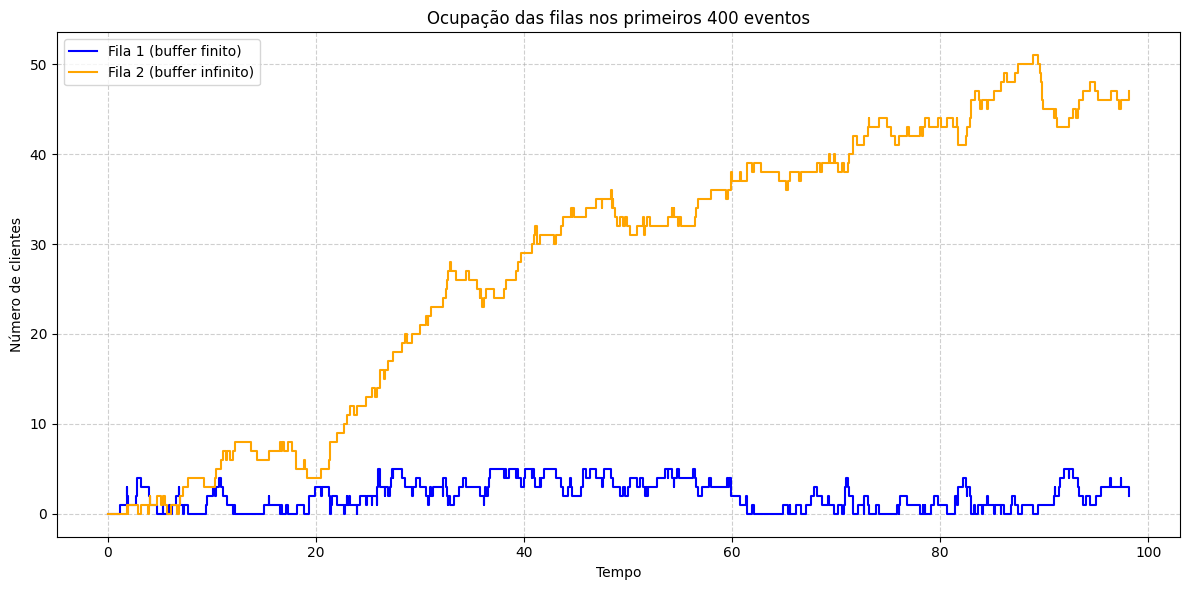

In [7]:
import numpy as np
import matplotlib.pyplot as plt

# ----- PARÂMETROS -----
taxa_chegada = 1.5    # lambda1, clientes por unidade de tempo
taxa_servico_1 = 2.0  # mu1, clientes por unidade de tempo
taxa_servico_2 = 1.0  # mu2, clientes por unidade de tempo
buffer_1 = 5       # K, capacidade máxima do buffer 1 (inclui atendimento)
tempo_simulacao = 100000    # Tempo total de simulação
max_pontos_grafico = 400    # Só mostrar os primeiros 400 eventos no gráfico

np.random.seed(42)

# Estado do sistema
num_fila_1 = 0
num_fila_2 = 0
tempo_atual = 0.0

# Estatísticas
chegadas_totais = 0
chegadas_bloqueadas = 0
saidas_totais_2 = 0
area_fila_1 = 0.0
area_fila_2 = 0.0
tempo_ultimo_evento = 0.0

# Para visualização apenas dos primeiros 400 eventos
linha_tempo = [0.0]
fila_1_lista = [0]
fila_2_lista = [0]

# Para tempos médios de permanência
fila_1_entradas = []  # Guarda tempos de chegada à fila 1
saidas_fila_1 = []    # Guarda tempos de permanência na fila 1
fila_2_entradas = []  # Guarda tempos de chegada à fila 2
saidas_fila_2 = []    # Guarda tempos de permanência na fila 2

proxima_chegada = np.random.exponential(1/taxa_chegada)
proxima_saida_1 = np.inf
proxima_saida_2 = np.inf

contador_eventos = 0

while tempo_atual < tempo_simulacao:
    tempos = [proxima_chegada, proxima_saida_1, proxima_saida_2]
    prox_evento = np.argmin(tempos)
    tempo_prox = min(tempos)
    area_fila_1 += num_fila_1 * (tempo_prox - tempo_ultimo_evento)
    area_fila_2 += num_fila_2 * (tempo_prox - tempo_ultimo_evento)
    tempo_ultimo_evento = tempo_prox
    tempo_atual = tempo_prox

    # Apenas salvar os primeiros 400 eventos para visualização
    if contador_eventos < max_pontos_grafico:
        linha_tempo.append(tempo_atual)
        fila_1_lista.append(num_fila_1)
        fila_2_lista.append(num_fila_2)
    contador_eventos += 1

    # Evento: CHEGADA
    if prox_evento == 0:
        chegadas_totais += 1
        if num_fila_1 < buffer_1:
            num_fila_1 += 1
            fila_1_entradas.append(tempo_atual)  # <-- NUEVO: registra tiempo de llegada a fila 1
            if num_fila_1 == 1:
                proxima_saida_1 = tempo_atual + np.random.exponential(1/taxa_servico_1)
        else:
            chegadas_bloqueadas += 1
        proxima_chegada = tempo_atual + np.random.exponential(1/taxa_chegada)


    # Evento: SAÍDA SERVIDOR 1
    elif prox_evento == 1:
        if num_fila_1 > 0:
            num_fila_1 -= 1
            # Calcula tempo de permanência na fila 1 para esse cliente
            entrada_fila1 = fila_1_entradas.pop(0)
            saidas_fila_1.append(tempo_atual - entrada_fila1)
            num_fila_2 += 1
            fila_2_entradas.append(tempo_atual)  # Registra chegada na fila 2
            if num_fila_1 > 0:
                proxima_saida_1 = tempo_atual + np.random.exponential(1/taxa_servico_1)
            else:
                proxima_saida_1 = np.inf
            if num_fila_2 == 1:
                proxima_saida_2 = tempo_atual + np.random.exponential(1/taxa_servico_2)


    # Evento: SAÍDA SERVIDOR 2
    elif prox_evento == 2:
        if num_fila_2 > 0:
            num_fila_2 -= 1
            # Calcula tempo de permanência na fila 2 para esse cliente
            entrada_fila2 = fila_2_entradas.pop(0)
            saidas_fila_2.append(tempo_atual - entrada_fila2)
            saidas_totais_2 += 1
            if num_fila_2 > 0:
                proxima_saida_2 = tempo_atual + np.random.exponential(1/taxa_servico_2)
            else:
                proxima_saida_2 = np.inf


# ----- RESULTADOS -----
print(f'Tempo total simulado: {tempo_simulacao}')
print(f'Número total de chegadas: {chegadas_totais}')
print(f'Número de chegadas bloqueadas: {chegadas_bloqueadas}')
print(f'Probabilidade de bloqueio (simulação): {chegadas_bloqueadas / chegadas_totais:.4f}')
print(f'Taxa efetiva de chegada ao servidor 2: {(chegadas_totais - chegadas_bloqueadas) / tempo_simulacao:.4f}')
print(f'Ocupação média fila 1: {area_fila_1 / tempo_simulacao:.4f}')
print(f'Ocupação média fila 2: {area_fila_2 / tempo_simulacao:.4f}')
print(f'Número total de saídas do sistema: {saidas_totais_2}')

# ---- TEMPOS MÉDIOS DE PERMANÊNCIA ----
if len(saidas_fila_1) > 0:
    E_tq1_sim = np.mean(saidas_fila_1)
    print(f'Tempo médio de permanência na fila 1 (simulação): {E_tq1_sim:.4f}')
else:
    print("Sem saídas para calcular E[tq1]")

if len(saidas_fila_2) > 0:
    E_tq2_sim = np.mean(saidas_fila_2)
    print(f'Tempo médio de permanência na fila 2 (simulação): {E_tq2_sim:.4f}')
else:
    print("Sem saídas para calcular E[tq2]")

if len(saidas_fila_1) > 0 and len(saidas_fila_2) > 0:
    print(f'Tempo médio total no sistema (simulação): {(E_tq1_sim + E_tq2_sim):.4f}')


# ----- VISUALIZAÇÃO DOS PRIMEIROS 400 EVENTOS -----
plt.figure(figsize=(12, 6))
plt.step(linha_tempo, fila_1_lista, where='post', label='Fila 1 (buffer finito)', color='blue')
plt.step(linha_tempo, fila_2_lista, where='post', label='Fila 2 (buffer infinito)', color='orange')
plt.xlabel('Tempo')
plt.ylabel('Número de clientes')
plt.title('Ocupação das filas nos primeiros 400 eventos')
plt.legend()
plt.grid(True, linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()